FACULTAD DE INGENIERÍA<br>
DEPARTAMENTO DE INGENIERÍA INDUSTRIAL<br>
INTRODUCCIÓN A LA ANALÍTICA DE NEGOCIOS<br>
TRABAJO DEL CURSO - SEGUNDA ENTREGA: 15% <br>
Semestre 2023-01<br>

Equipo de trabajo: Aura Luz Moreno Díaz, Marcelo Lemus, Verónica Andrea Morales González

---

# **Carga de datos**

*Carga de las librerias necesarias para la ejecución del código. En este caso usaremos Pandas y Numpy renombrándolas como pd y np*

In [2]:
#Carga de las librerias necesarias para la ejecución del código
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

Hemos montado los archivos de la base de datos a un hosting para poder trabajar los 3. Modificamos los permisos y se puede acceder a los datos desde cualquier lugar, de esta manera cualquier usuario puede ejecutar la BD desde cualquier parte.

In [3]:
#Realizamos pruebas para verificar que haya conexión a la base de datos
AH  = pd.read_csv('https://www.4minds.solutions/tarea/final/BDALARMAHUMO.csv', sep=';',  low_memory=False) #Base de datos de Alarmas de Humo
MOR = pd.read_csv('https://www.4minds.solutions/tarea/final/BDMORTALIDAD.csv', sep=';',  low_memory=False) #Base de datos de Mortalidad
ROC = pd.read_csv('https://www.4minds.solutions/tarea/final/BDROCIADORES.csv', sep=';',  low_memory=False) #Base de datos de Rociadores
DES = pd.read_csv('https://www.4minds.solutions/tarea/final/BDGENERALDESASTRES.csv', sep=';',  low_memory=False) #Base de datos de Desastres en general

In [4]:
#Vemos los nombres de las columnas-variables de la base de alarma de humo y cantidad de datos de cada una.
AH.count()

REF_DATE                                                1050
GEO                                                     1050
DGUID                                                    900
Performance of smoke alarm device, residential fires    1050
Incidents and casualties                                1050
UOM                                                     1050
UOM_ID                                                  1050
SCALAR_FACTOR                                           1050
SCALAR_ID                                               1050
VECTOR                                                  1050
COORDINATE                                              1050
VALUE                                                    845
STATUS                                                   205
SYMBOL                                                     0
TERMINATED                                                 0
DECIMALS                                                1050
dtype: int64

In [5]:
#Vemos los nombres de las columnas-variables de la base de rociadores y cantidad de datos de cada una.
ROC.count()

REF_DATE                                             1050
GEO                                                  1050
DGUID                                                 900
Performance of sprinkler system, structural fires    1050
Incidents and casualties                             1050
UOM                                                  1050
UOM_ID                                               1050
SCALAR_FACTOR                                        1050
SCALAR_ID                                            1050
VECTOR                                               1050
COORDINATE                                           1050
VALUE                                                 845
STATUS                                                205
SYMBOL                                                  0
TERMINATED                                              0
DECIMALS                                             1050
dtype: int64

In [6]:
#Vemos los nombres de las columnas-variables de la base de mortalidad y cantidad de datos de cada una.
MOR.count()

REF_DATE                 24840
GEO                      24840
DGUID                    24840
Casualties               24840
Age group of casualty    24840
Status of casualty       24840
Type of structure        24840
UOM                      24840
UOM_ID                   24840
SCALAR_FACTOR            24840
SCALAR_ID                24840
VECTOR                   24840
COORDINATE               24840
VALUE                    21942
STATUS                    2898
SYMBOL                       0
TERMINATED                   0
DECIMALS                 24840
dtype: int64

In [7]:
#Vemos los nombres de las columnas-variables de la base general de desastres.
DES.count()

EVENT CATEGORY                    1444
EVENT GROUP                       1430
EVENT SUBGROUP                    1426
EVENT TYPE                        1430
PLACE                             1436
EVENT START DATE                  1425
COMMENTS                          1436
FATALITIES                        1278
INJURED / INFECTED                1197
EVACUATED                         1139
ESTIMATED TOTAL COST               577
NORMALIZED TOTAL COST              557
EVENT END DATE                    1408
FEDERAL DFAA PAYMENTS              481
PROVINCIAL DFAA PAYMENTS           413
PROVINCIAL DEPARTMENT PAYMENTS      91
MUNICIPAL COSTS                     28
OGD COSTS                           14
INSURANCE PAYMENTS                 139
NGO PAYMENTS                         8
UTILITY - PEOPLE AFFECTED         1005
MAGNITUDE                         1152
dtype: int64

Se identifican columnas con nombres similares y otras relacionadas en las bases de mortalidad, rociadores y alarma de humo, por ejemplo **casualties** con **incidents** y **casualties**. Así como *Performance of sprinkler system*, *structural fires* y *Performance of smoke alarm device*, *residential fires*  que se refieren al funcionamiento del sistema como tal, por lo tanto se procede a unificar estas variables en las bases.

Como la tabla general de desastres tiene unas variables totalmente diferentes, se procede a concatenar las otras tres tablas.

## Renombrar algunas columnas

Antes de concatenar las bases, se renombran algunas columnas para que al concatenar, queden en la misma, dado que se refieren a una misma variable, pero en cada base tienen un nombre diferente.

In [8]:
MOR.rename(columns={'GEO':'GEO','Casualties':'Incidents&Casualties', 'REF_DATE':'YEAR'}, inplace=True)
MOR.columns

Index(['YEAR', 'GEO', 'DGUID', 'Incidents&Casualties', 'Age group of casualty',
       'Status of casualty', 'Type of structure', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [9]:
ROC.rename(columns={'GEO':'GEO','Incidents and casualties':'Incidents&Casualties','Performance of sprinkler system, structural fires':'performance_of_system','REF_DATE':'YEAR'}, inplace=True)
ROC.columns

Index(['YEAR', 'GEO', 'DGUID', 'performance_of_system', 'Incidents&Casualties',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [10]:
AH.rename(columns={'GEO':'GEO','Incidents and casualties':'Incidents&Casualties','Performance of smoke alarm device, residential fires':'performance_of_system','REF_DATE':'YEAR'},inplace=True)
AH.columns

Index(['YEAR', 'GEO', 'DGUID', 'performance_of_system', 'Incidents&Casualties',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [11]:
#DE la base de datos de desastres quitaremos los puntos para poder hacer bien los cálculos numéricos
DES['ESTIMATED TOTAL COST'] = DES['ESTIMATED TOTAL COST'].str.replace('.', '')
print(DES['ESTIMATED TOTAL COST'].head(10))

0            NaN
1    51093580000
2          00000
3            NaN
4          00000
5          00000
6            NaN
7            NaN
8            NaN
9          00000
Name: ESTIMATED TOTAL COST, dtype: object


<ipython-input-11-4fd6f9f62073>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DES['ESTIMATED TOTAL COST'] = DES['ESTIMATED TOTAL COST'].str.replace('.', '')


In [12]:
#DE la base de datos de desastres quitaremos los puntos para poder hacer bien los cálculos numéricos
DES['NORMALIZED TOTAL COST'] = DES['NORMALIZED TOTAL COST'].astype(str)
DES['NORMALIZED TOTAL COST'] = DES['NORMALIZED TOTAL COST'].str.replace('.', '')
print(DES['NORMALIZED TOTAL COST'].head(10))

0        nan
1    3357738
2         00
3        nan
4         00
5         00
6        nan
7        nan
8        nan
9         00
Name: NORMALIZED TOTAL COST, dtype: object


<ipython-input-12-e39bdb167eb3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DES['NORMALIZED TOTAL COST'] = DES['NORMALIZED TOTAL COST'].str.replace('.', '')


## Concatenar bases

Una vez renombradas, se procede a concatenar las tres bases con variables similares.

In [13]:
# concatenar las bases
CON = pd.concat([AH, MOR, ROC])
print('concat sin definir axis:' , CON.shape) # concatena por columnas

concat sin definir axis: (26940, 19)


In [14]:
#Revisamos las variables de la nueva base
CON.count()

YEAR                     26940
GEO                      26940
DGUID                    26640
performance_of_system     2100
Incidents&Casualties     26940
UOM                      26940
UOM_ID                   26940
SCALAR_FACTOR            26940
SCALAR_ID                26940
VECTOR                   26940
COORDINATE               26940
VALUE                    23632
STATUS                    3308
SYMBOL                       0
TERMINATED                   0
DECIMALS                 26940
Age group of casualty    24840
Status of casualty       24840
Type of structure        24840
dtype: int64

# **Depuración: Homologación de categorías, tipos de datos**
## A. Volver el nombre de las columnas a minúscula.
## usaremos la función lower para ponerlas todas en minúsculas

In [15]:
#Quitamos los espacios en blanco y pasamos a minusculas de la nueva tabla
CON['GEO'] = CON['GEO'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
CON['performance_of_system'] = CON['performance_of_system'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
CON['Incidents&Casualties'] = CON['Incidents&Casualties'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
CON['Status of casualty'] = CON['Status of casualty'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
CON['Type of structure'] = CON['Type of structure'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )

In [16]:
#Quitamos los espacios en blanco y pasamos a minusculas de la tabla general de desastres
DES['EVENT GROUP'] = DES['EVENT GROUP'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
DES['EVENT SUBGROUP'] = DES['EVENT SUBGROUP'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
DES['EVENT TYPE'] = DES['EVENT TYPE'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )
DES['PLACE'] = DES['PLACE'].apply(lambda x: x.lower().strip() if pd.notnull(x) else x )

In [17]:
# guardamos el df con las columnas definidas para ser analizadas de acuerdo con el contenido de las tres bases concatenadas.
CONS = CON.loc[:, ['YEAR', 'GEO', 'performance_of_system', 'Incidents&Casualties', 'VALUE', 'Status of casualty', 'Type of structure']]
CONS

,YEAR,GEO,performance_of_system,Incidents&Casualties,VALUE,Status of casualty,Type of structure
0,2005,canada,total residential fires,"fire incidents, residential properties",13619.0,NaN,NaN
1,2005,canada,total residential fires,"fire-related deaths, residential properties",144.0,NaN,NaN
2,2005,canada,total residential fires,"fire-related injuries, residential properties",998.0,NaN,NaN
3,2005,canada,no smoke alarm,"fire incidents, residential properties",1183.0,NaN,NaN
4,2005,canada,no smoke alarm,"fire-related deaths, residential properties",22.0,NaN,NaN
...,...,...,...,...,...,...,...
1045,2014,canadian armed forces,sprinkler did not operate,"fire-related deaths, structural",NaN,NaN,NaN
1046,2014,canadian armed forces,sprinkler did not operate,"fire-related injuries, structural",NaN,NaN,NaN
1047,2014,canadian armed forces,unknown performance of sprinkler system,"fire incidents, structural",55.0,NaN,NaN
1048,2014,canadian armed forces,unknown performance of sprinkler system,"fire-related deaths, structural",NaN,NaN,NaN


In [18]:
# guardamos el df con las columnas definidas para ser analizadas de acuerdo con su contenido - para la base general de incendios
DESA = DES.loc[:, ['EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE', 'EVENT START DATE', 'FATALITIES', 'INJURED / INFECTED', 'ESTIMATED TOTAL COST', 'NORMALIZED TOTAL COST', 'MAGNITUDE', 'PLACE']]
DESA

,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,EVENT START DATE,FATALITIES,INJURED / INFECTED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,MAGNITUDE,PLACE
0,technology,transportation accident,marine,11/17/1987 12:00:00 AM,34,0.0,NaN,nan,0.0,400 km off cape race nl
1,natural,meteorological - hydrological,storms and severe thunderstorms,1/16/1998 12:00:00 AM,21,0.0,51093580000,3357738,0.0,45 miles southwest of the islands of saint-pie...
2,technology,hazardous chemicals,leak / spill release,9/28/2005 12:00:00 AM,NaN,NaN,00000,00,0.0,abbotsford bc
3,natural,biological,epidemic,1/01/1918 0:00,50000,2000000.0,NaN,nan,0.0,across canada
4,natural,biological,epidemic,8/01/2008 0:00,22,57.0,00000,00,0.0,across canada
...,...,...,...,...,...,...,...,...,...,...
1444,natural,meteorological - hydrological,winter storm,11/13/2004 12:00:00 AM,0,0.0,NaN,nan,NaN,nova scotia
1445,natural,meteorological - hydrological,winter storm,1/17/2020 12:00:00 AM,2,0.0,NaN,nan,NaN,"avalon peninsula and bell island, newfoundland"
1446,natural,meteorological - hydrological,winter storm,1/10/2020 0:00,0,0.0,NaN,nan,NaN,southern ontairo and southern quebec
1447,natural,meteorological - hydrological,winter storm,4/05/1979 0:00,9,0.0,NaN,nan,NaN,ontario


## Homologación de categorías

In [19]:
# ver categorías de GEO con la frecuencia, en la base compilada CONS:
CONS['GEO'].value_counts()

canada                   4440
ontario                  4440
manitoba                 4440
saskatchewan             4440
alberta                  4440
british columbia         4440
canadian armed forces     300
Name: GEO, dtype: int64

Encontramos que está Canadá y Fuerza armada Canadiense, por lo que se unen estas dos como Canadá.

In [20]:
# remplazar las categorías en GEO
CONS['GEO'] = CONS['GEO'].replace(['canadian armed forces'], 'canada')

In [21]:
# verificamos las categorías de GEO con la frecuencia:
CONS['GEO'].value_counts()

canada              4740
ontario             4440
manitoba            4440
saskatchewan        4440
alberta             4440
british columbia    4440
Name: GEO, dtype: int64

In [22]:
#ver categorías de performance_of_system con la frecuencia, en la base compilada CONS::
CONS['performance_of_system'].value_counts()

total residential fires                      210
no smoke alarm                               210
alarm activated                              210
alarm did not activate                       210
unknown performance of smoke alarm device    210
total structural fires                       210
no sprinkler                                 210
sprinkler operated                           210
sprinkler did not operate                    210
unknown performance of sprinkler system      210
Name: performance_of_system, dtype: int64

No hay categorías que se repitan

In [23]:
# ver categorías de type of structure con la frecuencia, en la base compilada CONS:
CONS['Type of structure'].value_counts()

total structural fires                 2760
residential fires                      2760
industrial fires                       2760
assembly fires                         2760
mercantile fires                       2760
business use/personal service fires    2760
institutional fires                    2760
storage property fires                 2760
other structure type                   2760
Name: Type of structure, dtype: int64

No hay categorías que se repitan

In [24]:
# Revisamos ahora las categorías en la base general de desastres DESA, iniciamos con EVENT GROUP
DESA['EVENT GROUP'].value_counts()

natural       1011
technology     370
conflict        39
0                3
1                3
2                2
47               1
93               1
Name: EVENT GROUP, dtype: int64

Se tienen algunos datos sin sentido como las categorías 0, 1, 2, 47 y 93, por lo tanto se procede a cambiarlas y ponerlas como SIN que significa sin información.

In [25]:
# reemplazar las categorías en EVENT GROUP
DESA['EVENT GROUP'] = DESA['EVENT GROUP'].replace(['0', '1', '2', '47', '93'], 'SIN')

In [26]:
#Verificamos
DESA['EVENT GROUP'].value_counts()

natural       1011
technology     370
conflict        39
SIN             10
Name: EVENT GROUP, dtype: int64

In [27]:
# Revisamos ahora la categoría EVENT SUBGROUP
DESA['EVENT SUBGROUP'].value_counts()

meteorological - hydrological    899
transportation accident          142
fire                              89
hazardous chemicals               74
geological                        58
biological                        54
explosion                         50
terrorist                         20
infrastructure failure            14
arson                             10
civil incident                     8
0                                  3
hijacking                          1
space event                        1
25                                 1
45                                 1
6                                  1
Name: EVENT SUBGROUP, dtype: int64

Se tienen algunos datos sin sentido como las categorías 0, 25, 45, 6, por lo tanto se procede a cambiarlas y ponerlas como s.i. que significa sin información. Y se tiene la categoría fire y arson que se refieren a fuego, por lo cual se reunen en una como fire.  Se tiene también civil incident y hijacking que traduce secuestro, por lo que puede estar dentro de la categoría de incidente civil.

In [28]:
# remplazar las categorías en EVENT SUBGROUP
DESA['EVENT SUBGROUP'] = DESA['EVENT SUBGROUP'].replace(['0', '25', '45', '6'], 'SIN')
DESA['EVENT SUBGROUP'] = DESA['EVENT SUBGROUP'].replace(['arson'], 'fire')
DESA['EVENT SUBGROUP'] = DESA['EVENT SUBGROUP'].replace(['hijacking'], 'civil incident')

In [29]:
#Verificamos
DESA['EVENT SUBGROUP'].value_counts()

meteorological - hydrological    899
transportation accident          142
fire                              99
hazardous chemicals               74
geological                        58
biological                        54
explosion                         50
terrorist                         20
infrastructure failure            14
civil incident                     9
SIN                                6
space event                        1
Name: EVENT SUBGROUP, dtype: int64

In [30]:
# Revisamos ahora la categoría EVENT TYPE
DESA['EVENT TYPE'].value_counts()

flood                                   336
storms and severe thunderstorms         141
wildfire                                113
non-residential                         105
winter storm                             89
tornado                                  51
epidemic                                 50
air                                      47
drought                                  46
residential                              43
marine                                   41
landslide                                40
hurricane / typhoon / tropical storm     39
storm - unspecified / other              34
rail                                     31
vehicle                                  25
leak / spill release                     23
derailment release                       18
fire                                     17
avalanche                                17
earthquake                               12
storm surge                              10
cold event                      

Se tienen algunos datos sin sentido como las categorías 3000, 10000, 1400, 4900, 3200, 65000, 500, 560, 0 Y 2000 por lo tanto se procede a cambiarlas y ponerlas como s.i. que significa sin información.

Se tienen las categorías storms and severe thunderstorms, winter storm, hurricane / typhoon / tropical storm, storm - unspecified / other, geomagnetic storm que se refieren a tormentas, por lo cual se reunen en una como storm.

Se tienen las categorías air, tornado, que se reunen en una como air.
Se tienen las categorías wildfire, fire, que se reunen en una como fire.
Se tienen las categorías vehicle, vehicle release, transportation que se reunen en una como vehicle.
Se tienen las categorías rioting, disturbance / demonstrations que se reunen en una como disturbance / demonstrations.
Se tienen las categorías pandemic, infestation, epidemic que se reunen en una como infestation/epidemic/pandemic.


In [31]:
# remplazar las categorías en EVENT TYPE
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['3000', '10000', '1400', '4900', '3200', '65000', '500', '560', '0', '2000'], 'SIN')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['storms and severe thunderstorms', 'winter storm', 'hurricane / typhoon / tropical storm', 'storm - unspecified / other', 'geomagnetic storm'], 'storm')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['tornado'], 'air')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['wildfire'], 'fire')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['heat event','drought' ], 'head event/drought')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['vehicle','vehicle release', 'transportation'], 'vehicle')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['rioting'], 'disturbance / demonstrations')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].replace(['pandemic', 'infestation', 'epidemic'], 'infestation/epidemic/pandemic')

In [32]:
#Verificamos
DESA['EVENT TYPE'].value_counts()

flood                            336
storm                            308
fire                             130
non-residential                  105
air                               98
infestation/epidemic/pandemic     54
head event/drought                54
residential                       43
marine                            41
landslide                         40
vehicle                           36
rail                              31
leak / spill release              23
derailment release                18
avalanche                         17
earthquake                        12
SIN                               10
storm surge                       10
cold event                        10
marine release                     9
bomb attacks                       9
disturbance / demonstrations       8
manufacturing / industry           7
shootings                          6
tsunami                            5
kidnapping / murder                4
volcano                            1
w

# **Tratamiento de datos nulos**

In [33]:
# validar cuales columnas tienen nulos en la base concatenada
CONS.isnull().sum()

YEAR                         0
GEO                          0
performance_of_system    24840
Incidents&Casualties         0
VALUE                     3308
Status of casualty        2100
Type of structure         2100
dtype: int64

In [34]:
#Para performance_of_system, value, status of casualty y type of structure agruparemos los nulos en "n.i." que significa que no hay información para que queden allá todos los no identificados
CONS['performance_of_system'] = CONS['performance_of_system'].fillna('SIN')
CONS['VALUE'] = CONS['VALUE'].fillna('SIN')
CONS['Status of casualty'] = CONS['Status of casualty'].fillna('SIN')
CONS['Type of structure'] = CONS['Type of structure'].fillna('SIN')

In [35]:
# REVISAMOS LA BASE CONCATENADA
CONS.isnull().sum()

YEAR                     0
GEO                      0
performance_of_system    0
Incidents&Casualties     0
VALUE                    0
Status of casualty       0
Type of structure        0
dtype: int64

In [36]:
# validar cuales columnas tienen nulos en la base general de desastres
DESA.isnull().sum()

EVENT GROUP               19
EVENT SUBGROUP            23
EVENT TYPE                19
EVENT START DATE          24
FATALITIES               171
INJURED / INFECTED       252
ESTIMATED TOTAL COST     872
NORMALIZED TOTAL COST      0
MAGNITUDE                297
PLACE                     13
dtype: int64

Se encuentran datos nulos en todas las columnas, los cuales se reemplazarán por n.i. que significa que no hay información.

In [37]:
DESA['EVENT GROUP'] = DESA['EVENT GROUP'].fillna('SIN')
DESA['EVENT SUBGROUP'] = DESA['EVENT SUBGROUP'].fillna('SIN')
DESA['EVENT TYPE'] = DESA['EVENT TYPE'].fillna('SIN')
DESA['EVENT START DATE'] = DESA['EVENT START DATE'].fillna('SIN')
DESA['FATALITIES'] = DESA['FATALITIES'].fillna('SIN')
DESA['INJURED / INFECTED'] = DESA['INJURED / INFECTED'].fillna('SIN')
DESA['MAGNITUDE'] = DESA['MAGNITUDE'].fillna('SIN')

In [38]:
# Revisamos esta base
DESA.isnull().sum()

EVENT GROUP                0
EVENT SUBGROUP             0
EVENT TYPE                 0
EVENT START DATE           0
FATALITIES                 0
INJURED / INFECTED         0
ESTIMATED TOTAL COST     872
NORMALIZED TOTAL COST      0
MAGNITUDE                  0
PLACE                     13
dtype: int64

Ahora las bases está sin datos nulos.

# **Generación de bodegas de datos**


Una vez depuradas las bases tenemos las siguientes dos bodegas de datos

In [39]:
DESA.head()

,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,EVENT START DATE,FATALITIES,INJURED / INFECTED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,MAGNITUDE,PLACE
0,technology,transportation accident,marine,11/17/1987 12:00:00 AM,34,0.0,NaN,nan,0.0,400 km off cape race nl
1,natural,meteorological - hydrological,storm,1/16/1998 12:00:00 AM,21,0.0,51093580000,3357738,0.0,45 miles southwest of the islands of saint-pie...
2,technology,hazardous chemicals,leak / spill release,9/28/2005 12:00:00 AM,SIN,SIN,00000,00,0.0,abbotsford bc
3,natural,biological,infestation/epidemic/pandemic,1/01/1918 0:00,50000,2000000.0,NaN,nan,0.0,across canada
4,natural,biological,infestation/epidemic/pandemic,8/01/2008 0:00,22,57.0,00000,00,0.0,across canada


In [40]:
CONS.head()

,YEAR,GEO,performance_of_system,Incidents&Casualties,VALUE,Status of casualty,Type of structure
0,2005,canada,total residential fires,"fire incidents, residential properties",13619.0,SIN,SIN
1,2005,canada,total residential fires,"fire-related deaths, residential properties",144.0,SIN,SIN
2,2005,canada,total residential fires,"fire-related injuries, residential properties",998.0,SIN,SIN
3,2005,canada,no smoke alarm,"fire incidents, residential properties",1183.0,SIN,SIN
4,2005,canada,no smoke alarm,"fire-related deaths, residential properties",22.0,SIN,SIN


# **Transformaciones: Aplicación de funciones para la creación de nuevas variables**

Aquí ponemos extraer el año, creando una nueva variable en la base "DESA" con la variable EVENT START DATE

In [41]:
DESA.columns

Index(['EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE', 'EVENT START DATE',
       'FATALITIES', 'INJURED / INFECTED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'MAGNITUDE', 'PLACE'],
      dtype='object')

In [42]:
#Convertimos la columna "EVENT START DATE" a formato de datetime
DESA['EVENT START DATE']=pd.to_datetime(DESA['EVENT START DATE'],errors='coerce')

# Creamos las nuevas variables YEAR , MONTH , DAY 
DESA.insert(0,'YEAR', DESA.loc[DESA['EVENT START DATE'].notnull(), 'EVENT START DATE'].dt.year)
DESA.insert(1,'MONTH', DESA.loc[DESA['EVENT START DATE'].notnull(), 'EVENT START DATE'].dt.month)
DESA.insert(2,'DAY', DESA.loc[DESA['EVENT START DATE'].notnull(), 'EVENT START DATE'].dt.day)

#Las columnas YEAR , MONTH , DAY quedaron como flotantes, por haber valores null en las fechas. Convertimos los valores null de estos nuevos campos al valor entero 0.
DESA['YEAR']=DESA['YEAR'].fillna(0).astype(int)
DESA['MONTH']=DESA['MONTH'].fillna(0).astype(int)
DESA['DAY']=DESA['DAY'].fillna(0).astype(int)

#Ahora convertimos los campos a valor entero.
DESA['YEAR']=DESA['YEAR'].astype(int)
DESA['MONTH']=DESA['MONTH'].astype(int)
DESA['DAY']=DESA['DAY'].astype(int)

#Queremos que en el campo MONTH aparezca el nombre del mes y no un numero entero. 
import calendar
DESA['MONTH'] = DESA['MONTH'].apply(lambda x: calendar.month_abbr[x] if x != 0 else '')

DESA.head()

,YEAR,MONTH,DAY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,EVENT START DATE,FATALITIES,INJURED / INFECTED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,MAGNITUDE,PLACE
0,1987,Nov,17,technology,transportation accident,marine,1987-11-17,34,0.0,NaN,nan,0.0,400 km off cape race nl
1,1998,Jan,16,natural,meteorological - hydrological,storm,1998-01-16,21,0.0,51093580000,3357738,0.0,45 miles southwest of the islands of saint-pie...
2,2005,Sep,28,technology,hazardous chemicals,leak / spill release,2005-09-28,SIN,SIN,00000,00,0.0,abbotsford bc
3,1918,Jan,1,natural,biological,infestation/epidemic/pandemic,1918-01-01,50000,2000000.0,NaN,nan,0.0,across canada
4,2008,Aug,1,natural,biological,infestation/epidemic/pandemic,2008-08-01,22,57.0,00000,00,0.0,across canada


In [43]:
#EVENT START DATE contiene valores nulos, ya que fue una columna que fue desglosada, procedemos a eliminarla.
DESA = DESA.drop('EVENT START DATE', axis=1)
DESA.columns

Index(['YEAR', 'MONTH', 'DAY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'FATALITIES', 'INJURED / INFECTED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'MAGNITUDE', 'PLACE'],
      dtype='object')

# **Análisis descriptivo sobre las bases individuales y su relación: Plantearse 9 preguntas que le ayuden a tener un entendimiento de la información recolectada y le permitan estar más cerca de concluir sobre el tema analizado. Dar  respuesta a estas preguntas a través de tablas y gráficos.**

# 1. ¿Cuál es el costo promedio de la normalización por tipo de desastre ?

In [44]:
import pandas as pd
import numpy as np

#Convertimos a tipo string y removemos separador de miles y la convertimos a tipo numerico haciendo coerción en los errores para que los valores no numéricos se conviertan en NaN.
DESA['NORMALIZED TOTAL COST'] = DESA['NORMALIZED TOTAL COST'].astype(str)
DESA['NORMALIZED TOTAL COST'] = DESA['NORMALIZED TOTAL COST'].str.replace('.', '')
DESA['NORMALIZED TOTAL COST'] = pd.to_numeric(DESA['NORMALIZED TOTAL COST'], errors='coerce')

#Calculamos ahora si el costo promedio por tipo de desastre, teniendo en cuenta solo los valores no nulos y los ordenamos ascendentemente
costo_promedio = DESA.groupby('EVENT TYPE')['NORMALIZED TOTAL COST'].mean()
costo_promedio_ordenado = costo_promedio.sort_values(ascending=False)

# Como da un número tan grande, entonces formateamos el costo promedio en formato alargado y sin decimales con símbolo de dólar y separador de miles para que se entienda mejor
costo_promedio_formateado = costo_promedio_ordenado.apply(lambda x: "${:,.0f}".format(x))

# Crear una tabla a partir del costo promedio ordenado y formateado para que se pueda visualizar mejor
#tabla_costo_promedio = pd.DataFrame({'EVENT TYPE': costo_promedio_ordenado.index, 'Costo Promedio': costo_promedio_formateado}).reset_index()
tabla_costo_promedio = pd.DataFrame({'Costo Promedio': costo_promedio_formateado}).reset_index()
tabla_costo_promedio

<ipython-input-44-a09a51d57453>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DESA['NORMALIZED TOTAL COST'] = DESA['NORMALIZED TOTAL COST'].str.replace('.', '')


,EVENT TYPE,Costo Promedio
0,earthquake,"$84,126,703"
1,fire,"$39,595,179"
2,storm,"$37,614,175"
3,flood,"$29,566,321"
4,head event/drought,"$28,718,452"
5,air,"$26,065,869"
6,storm surge,"$4,619,269"
7,infestation/epidemic/pandemic,"$2,746,491"
8,landslide,"$2,537,194"
9,avalanche,"$2,192,950"


### Se tiene que los desastres que implican mayores costos para la normalización están grandemente marcados en un top 6 con respecto al resto de desastres, en primer lugar están los terremotos dada su naturaleza y poder de afectación estructural con costo promedio de 84,126,702,800,000. En segundo lugar están los incendios de todo tipo, que claramente pueden acabar con todo a su paso si no es controlado y cuyo costo es inferior al 50% del costo de los terremotos, estando en $39,595,179,216,216, luego están las inundaciones que pueden acabar también con  los enseres y estructuras muy fácilmente. Despúes están los ciclones y desastres por aire. En séptimo lugar ya se ubican otros tipos de desastres cuya diferencia en costos de normalización es notablemente inferior con respecto a este top seis descrito aquí.

#2. ¿Cual es el porcentaje de incendios con respecto al resto de desastres?

Representado en gráfico de torta.

In [45]:
import plotly.express as px
import pandas as pd

#Calculamos el número de incendios y el número total de desastres
num_incendios = DESA[DESA['EVENT TYPE'] == 'fire'].shape[0]
num_total_desastres = DESA.shape[0]

# Calculamos el número de desastres que no son incendios para poder configurar bien la torta
num_desastres_no_incendios = num_total_desastres - num_incendios
porcentaje_incendios = (num_incendios / num_total_desastres) * 100
porcentaje_no_incendios = 100 - porcentaje_incendios

data = pd.DataFrame({'Tipo de Desastre': ['Incendios', 'Otros Desastres'], 'Porcentaje': [porcentaje_incendios, porcentaje_no_incendios]})

fig = px.pie(data, values='Porcentaje', names='Tipo de Desastre', hole=0.5)
fig.show()

### Se tiene que el 8.97% del total de desastres están dados por incendios, lo cual es un número importante si se tiene en cuenta que dentro de la base hay 32 tipos de desastres en total, y que una distribución promedio sería de 3,1% para cada desastre.

# 3.  ¿Cuál es la cantidad de incendios por año?
Se muestra un gráfico de lineas

<Axes: xlabel='Año'>

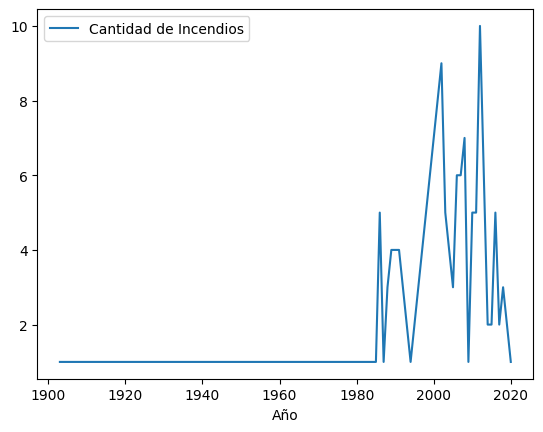

In [46]:
#Filtramos los registros que corresponden a incendios
incendios = DESA[DESA['EVENT TYPE'] == 'fire']

#calculamos la cantidad de incendios por año
cantidad_incendios_por_año = incendios['YEAR'].value_counts().sort_index()

data = pd.DataFrame({'Año': cantidad_incendios_por_año.index, 'Cantidad de Incendios': cantidad_incendios_por_año.values})

data.plot( 'Año' , 'Cantidad de Incendios' )


### Puede observarse en el gráfico, que la mayor cantidad de incendios se han venido presentando en los últimos 40 años, ya que entre los años 1900 y 1980 se presentaron solo 15 incendios, mientras que después de 1980 y hasta el 2020, se presentaron 115 incendios.
Esto también se puede presentar cuando no existe información disponible o bien se empezó a tomar oficialmente después de un año en particular, cuando ya se tenía establecido todo el sistema para prevención de desastres.

# 4.  ¿Cuál es la tasa de mortalidad de los incendios por año?

###            Total de incendios con muertos/ Total de incendios. Se presenta en gráfico de barras.


In [47]:
# Convertimos las columnas a tipo numerico
DESA['FATALITIES'] = pd.to_numeric(DESA['FATALITIES'], errors='coerce')
DESA['YEAR'] = pd.to_numeric(DESA['YEAR'], errors='coerce')

#Sacamos solo los que digan Fire y calculamos el total por año y cuales con muertos
incendios = DESA[DESA['EVENT TYPE'] == 'fire']
total_incendios = incendios.groupby('YEAR').size()
incendios_muertos = incendios.groupby('YEAR')['FATALITIES'].count()

#Ahora si calculamos la tasa de mortalidad y creamos el dataframe*1
tasa_mortalidad = round(((incendios_muertos / total_incendios)*100),2)
tasa_mortalidad_df = pd.DataFrame({'YEAR': tasa_mortalidad.index, 'tasa de Mortalidad (%)': tasa_mortalidad.values})
figm = px.bar(tasa_mortalidad_df, x='YEAR', y='tasa de Mortalidad (%)', labels={'Año': 'Año', 'tasa_mortalidad_df': 'tasa de Mortalidad (%)'})

figm.show()

### Se observa que la tasa de mortalidad en generales alta en los incendios ocurridos durante 1900 y 1998, sin embargo, para los 22 años siguientes,  la mortalidad en cada evento varió entre el 20% y el 100%.

# 5. ¿Cómo es la distribución de ocurrencia de incendios por día de la semana?  
Gráfico de barras

In [48]:
incendios.columns

Index(['YEAR', 'MONTH', 'DAY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'FATALITIES', 'INJURED / INFECTED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'MAGNITUDE', 'PLACE'],
      dtype='object')

In [49]:
import plotly.express as px

# Convertir las columnas 'YEAR', 'MONTH' y 'DAY' a tipo fecha para poder concatenar la fecha y sacar el dia de la semana específico
DESA['YEAR'] = pd.to_datetime(DESA['YEAR'], format='%Y', errors='coerce')
DESA['MONTH'] = pd.to_datetime(DESA['MONTH'], format='%m', errors='coerce')
DESA['DAY'] = pd.to_datetime(DESA['DAY'], format='%d', errors='coerce')

#Creamos la columna weekday para determinar el dia de la semana y filtramos por incendios
DESA['WEEKDAY'] = DESA['DAY'].dt.day_name()
incendios = DESA[DESA['EVENT TYPE'] == 'fire']
ocurrencia_incendios = incendios['WEEKDAY'].value_counts()

df_ocurrencia_incendios = pd.DataFrame({'Día de la semana': ocurrencia_incendios.index, 'Ocurrencia': ocurrencia_incendios.values})
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_ocurrencia_incendios['Día de la semana'] = pd.Categorical(df_ocurrencia_incendios['Día de la semana'], categories=dias_semana_ordenados, ordered=True)
df_ocurrencia_incendios = df_ocurrencia_incendios.sort_values('Día de la semana')
fig = px.bar(df_ocurrencia_incendios, x='Día de la semana', y='Ocurrencia', color='Día de la semana',title='Ocurrencia de Incendios por Día de la Semana', )
fig.show()

Se observa que hay mayor incidencia de incendios el Lunes, seguido del Martes y luego el Miércoles. 

# 6. ¿Cuál es el número de incendios por localidad?  


In [50]:
CONS.columns

Index(['YEAR', 'GEO', 'performance_of_system', 'Incidents&Casualties', 'VALUE',
       'Status of casualty', 'Type of structure'],
      dtype='object')

In [51]:
incendios_por_localidad = CONS['GEO'].value_counts()
df_incendios = pd.DataFrame({'Localidad': incendios_por_localidad.index, 'Número de Incendios': incendios_por_localidad.values})
# Definir una lista de colores para las barras
colores = ['Yellow', 'orange', 'red', 'purple', 'blue', 'green']  # Puedes agregar más colores si es necesario

fig = px.bar(df_incendios, x='Localidad', y='Número de Incendios', title='Número de Incendios por Localidad', color='Localidad', color_discrete_sequence=colores)

# Mostrar el gráfico
fig.show()

Se observa que extrañamente la localidad de Canadá es la única con datos diferentes al resto de localidades, las cuales tienen un número similar de eventos correspondiente a 4440.

# 7. ¿Cuál es la distribución de los incendios (residenciales/no residenciales)?
Se muestra en gráfico de torta para apreciar el comparativo.

In [52]:
DESA.columns
#count_fire = DESA[DESA['EVENT SUBGROUP'] == 'fire']['EVENT SUBGROUP'].value_counts()
#count_fire


Index(['YEAR', 'MONTH', 'DAY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'FATALITIES', 'INJURED / INFECTED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'MAGNITUDE', 'PLACE', 'WEEKDAY'],
      dtype='object')

In [53]:
event_types = DESA['EVENT SUBGROUP'].unique()
event_types

array(['transportation accident', 'meteorological - hydrological',
       'hazardous chemicals', 'biological', 'infrastructure failure',
       'geological', 'terrorist', 'fire', 'explosion', 'civil incident',
       'space event', 'SIN'], dtype=object)

In [54]:
event_types = DESA['EVENT TYPE'].unique()
event_types

array(['marine', 'storm', 'leak / spill release',
       'infestation/epidemic/pandemic', 'head event/drought',
       'cold event', 'communications', 'flood', 'rail', 'air', 'fire',
       'earthquake', 'storm surge', 'avalanche', 'derailment release',
       'landslide', 'bomb attacks', 'non-residential', 'tsunami',
       'residential', 'marine release', 'vehicle',
       'disturbance / demonstrations', 'volcano',
       'manufacturing / industry', 'water', 'kidnapping / murder',
       'space debris', 'energy', 'shootings', 'SIN', 'chemical'],
      dtype=object)

In [55]:
fire_rows = DESA[(DESA['EVENT TYPE'] == 'residential') & (DESA['EVENT SUBGROUP'] == 'fire')]
fire_rows


,YEAR,MONTH,DAY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,FATALITIES,INJURED / INFECTED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,MAGNITUDE,PLACE,WEEKDAY
88,2002-01-01,NaT,1900-01-30,technology,fire,residential,0.0,0.0,00000,0.0,0.0,calgary ab,Tuesday
115,1980-01-01,NaT,1900-01-01,conflict,fire,residential,45.0,55.0,NaN,NaN,0.0,chapais region of chibougamau qc,Monday
173,1969-01-01,NaT,1900-01-01,technology,fire,residential,13.0,0.0,NaN,NaN,0.0,dunnville on,Monday
198,2007-01-01,NaT,1900-01-21,technology,fire,residential,0.0,0.0,00000,0.0,0.0,edmonton ab,Sunday
215,1908-01-01,NaT,1900-01-01,technology,fire,residential,100.0,0.0,NaN,NaN,0.0,fernie bc,Monday
278,1980-01-01,NaT,1900-01-01,technology,fire,residential,0.0,0.0,NaN,NaN,0.0,hamilton on,Monday
306,1991-01-01,NaT,1900-01-26,technology,fire,residential,0.0,1.0,NaN,NaN,0.0,jarvis on,Friday
345,1959-01-01,NaT,1900-01-01,technology,fire,residential,0.0,0.0,NaN,NaN,0.0,lanark on,Monday
363,1930-01-01,NaT,1900-01-01,technology,fire,residential,0.0,0.0,NaN,NaN,0.0,liverpool ns,Monday
398,1921-01-01,NaT,1900-01-01,technology,fire,residential,NaN,SIN,NaN,NaN,0.0,merville and lang bc,Monday


In [56]:
residenciales = DESA[DESA['EVENT TYPE'] == 'residential'][DESA['EVENT SUBGROUP'] == 'fire']
cantidad_residenciales = len(residenciales)
no_residenciales = DESA[DESA['EVENT TYPE'] == 'non-residential'][DESA['EVENT SUBGROUP'] != 'fire']
cantidad_no_residenciales = len(no_residenciales)
df_incendios = pd.DataFrame({'Tipo de Incendio': ['Residenciales', 'No Residenciales'], 'Cantidad': [cantidad_residenciales, cantidad_no_residenciales]})
fig = px.pie(df_incendios, values='Cantidad', names='Tipo de Incendio', title='Distribución de Incendios Residenciales y No Residenciales')
fig.show()

<ipython-input-56-ddeef4e8ddc4>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-56-ddeef4e8ddc4>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Se tiene que los incndios no residenciales son los que más se presentan con un 53.9% en comparación con los incendios residenciales.

# 8. ¿Cuál es el porcentaje de incendios en los que funcionaron efectivamente los rociadores?  tasa de efectividad= Total de incendios apagados por rociadoress/total de incendios 

In [57]:
ROC.columns

Index(['YEAR', 'GEO', 'DGUID', 'performance_of_system', 'Incidents&Casualties',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [58]:
conteo_eventos = ROC['performance_of_system'].value_counts()
conteo_eventos

Total structural fires                     210
No sprinkler                               210
Sprinkler operated                         210
Sprinkler did not operate                  210
Unknown performance of sprinkler system    210
Name: performance_of_system, dtype: int64

In [59]:
conteo_performance = ROC['performance_of_system'].value_counts()
incendios_con_rociadores = conteo_performance['Sprinkler operated']
total_incendios = ROC.shape[0]
porcentaje_efectividad = (incendios_con_rociadores / total_incendios) * 100


In [60]:
conteo_performance = ROC['performance_of_system'].value_counts()
incendios_con_rociadores = conteo_performance['Sprinkler operated']
incendios_sin_rociadores = total_incendios - incendios_con_rociadores
data = {'Resultado': ['No funcionaron', 'Si funcionaron'],'Cantidad': [incendios_con_rociadores, incendios_sin_rociadores]}

df = pd.DataFrame(data)

fig = px.pie(df, values='Cantidad', names='Resultado', title='Porcentaje de Efectividad de Rociadores')
fig.show()


In [61]:
print("El porcentaje de efectividad de los rociadores es:", porcentaje_efectividad)

El porcentaje de efectividad de los rociadores es: 20.0


# 9.  ¿Cuál es el porcentaje de incendios en los que funcionaron efectivamente  las alarmas de humo?
 tasa de efectividad: Total de incendios donde la alrma funcionó/total de incendios

In [62]:
AH.columns

Index(['YEAR', 'GEO', 'DGUID', 'performance_of_system', 'Incidents&Casualties',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [67]:
conteo_eventos = AH['Performance of smoke alarm device, residential fires'].value_counts()
conteo_eventos

KeyError: ignored

In [65]:
conteo_performance = AH['Performance of smoke alarm device, residential fires'].value_counts()
incendios_con_alarma = conteo_performance['Alarm activated']
incendios_sin_alarma = total_incendios - incendios_con_alarma
data = {'Resultado': ['Alarmas Activadas', 'Alarmas No Activadas'],'Cantidad': [incendios_con_alarma, incendios_sin_alarma]}

df = pd.DataFrame(data)

fig = px.pie(df, values='Cantidad', names='Resultado', title='Tasa de Efectividad de Alarmas de Humo')

fig.show()


KeyError: ignored

### El porcentaje o tasa de efectividad  de funcionamiento de las alarmas de humo es del 20%.

# **Se revisa a nivel general, cómo es la distribución de la cantidad de desastres por cada tipo y cuál es el que tiene mayor ocurrencia en el periodo.**

In [ ]:
desastre=DESA['EVENT TYPE'].value_counts()
desastre_df = pd.DataFrame({'EVENT TYPE': desastre.index, 'Cantidad desastres': desastre.values})
figd = px.bar(desastre_df, x='EVENT TYPE', y='Cantidad desastres', labels={'EVENT TYPE': 'Tipo de desastre', 'desastre_df': 'Tipo de desastre'})

figd.show()


### Dentro de la base general de desastres, se encuentra que el desastre de mayor ocurrencia es el de *inundaciones*, en segundo lugar las *tormentas* y en tercer lugar los *incendios*, por lo tanto, hacer énfases en el tipo de desastres de incendios vale la pena, ya que está en el top 3 de ocurrencia, sin embargo, sería interesante indagar sobre algunos datos de las inundaciones y de las tormentas, aunque estos tipos de desastres, tienen menos posibilidades de ser controlados.

# **Se realiza el ejercicio de ocurrencia de desastres por inundaciones por año**

In [ ]:
#Filtramos los registros que corresponden a inundaciones
inundaciones = DESA[DESA['EVENT TYPE'] == 'flood']

#calculamos la cantidad de inundaciones por año
cantidad_Inundaciones_por_año = inundaciones['YEAR'].value_counts().sort_index()

dataI = pd.DataFrame({'Año': cantidad_Inundaciones_por_año.index, 'Cantidad de Inundaciones': cantidad_Inundaciones_por_año.values})

dataI.plot( 'Año' , 'Cantidad de Inundaciones' )

### En comparación con la ocurrencia de incendios, se tiene una misma tendencia, ya que la mayor cantidad de ocurrencia de este tipo desastres ha sido durante los últimos años; de 1970 y 1980 en adelante.

# **Se realiza también el ejercicio de ocurrencia de desastres por tormentas por año para ver su comportamiento en el tiempo**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Filtramos los registros que corresponden a tormentas
tormentas = DESA[DESA['EVENT TYPE'] == 'storm']

#calculamos la cantidad de tormentas por año
cantidad_tormentas_por_año = tormentas['YEAR'].value_counts().sort_index()

dataT = pd.DataFrame({'Año': cantidad_tormentas_por_año.index, 'Cantidad de tormentas': cantidad_tormentas_por_año.values})

dataT.plot( 'Año' , 'Cantidad de tormentas' )



## En comparación con la ocurrencia de incendios y la ocurrencia de inundaciones, se tiene una misma tendencia, ya que la mayor cantidad de ocurrencia de este tipo desastres ha sido durante los últimos años; de 1970 y 1980 en adelante.

## A nivel general, puede decirse que el top 3 de desastres, conformado por inundaciones, tormentas e incendios, tienen una misma tendencia de comportamiento en el tiempo en cuanto a la cantidad de eventos ocurridos. Podría especularse, que a principios de siglo, quizá la ocurrencia haya sido similar, pero los datos no hayan quedado registrados, ya que la diferencia de la variación entre la frecuencia y cantidad de eventos a principio de siglo y a final de siglo, es bastante notoria.

# **Finalmente, se revisa la cantidad de muertes generadas por estos tres principales tipos de desastre para tener un comparativo de ocurrencia versus impactos.**

In [68]:
eventos = ['fire', 'storm', 'flood']
filtro_eventos = DESA['EVENT TYPE'].isin(eventos)
datos_filtrados = DESA[filtro_eventos]
muertes = datos_filtrados.groupby('EVENT TYPE')['FATALITIES'].sum().reset_index()
df_muertes = pd.DataFrame({'Tipo de evento': muertes['EVENT TYPE'], 'Cantidad de muertes': muertes['FATALITIES']})
fig = px.bar(df_muertes, x='Tipo de evento', y='Cantidad de muertes',labels={'Tipo de evento': 'Tipo de evento', 'Cantidad de muertes': 'Cantidad de muertes'},title='Cantidad de muertes por tipo de evento')

fig.show()


### Se tiene como resultado que que las tormentas son las que tienen mayor número de muertes con 1725 casos, luego sigue incendios con 388 casos y finalmente las inundaciones a pesar de que tienen mayor ocurrencia como se vio anteriormente, tienen la menor cantidad de muertes en estos tres tipos de desastre con 124 casos.